# KBMod Simulated Object Analysis Demo

To run an example of kbmod with simulated objects inserted into existing images you can use the following steps:

1) Setup `kbmod` with the `setup.bash` file in the main directory of the repo by: `source setup.bash`

2) Run `example_fake_run.py` with the following settings:

  * **image_dir**: The directory with the images from a single field
    
  * **results_dir**: The directory where you want to save the results
    
  * **results_suffix**: Suffix to add when saving results files. Setting this as `test` then files will be saved as "..._test.txt". Five results files would be saved:
      * `lc_test.txt`: File with the light curves from results after going through Kalman Filter.
      * `results_test.txt`: File with the x,y pixel locations, velocity, flux, likelihood, and number of unmasked observations of each result.
      * `ps_test.txt`: File with the summed postage stamp for each result.
      * `times_test.txt`: File with the MJD of each observation in the saved lightcurve.
      * `filtered_likes_test.txt`: The recalculated likelihood values for each results after removing observations with the Kalman Filter.
  * **time_file**: Location of a file with each row containing (visit_num, visit_mjd) for observations in dataset.
    
3) Command will be like the following:

```
python example_fake_run.py --image_dir image_dir --results_dir results_dir --results_suffix test --time_file image_times.dat
```

4) Once you have the results you can use the steps in this notebook to create plots with postage stamps and lightcurves side-by-side for a final look by eye.

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astropy.io import fits
from collections import OrderedDict
plt.style.use('ggplot')
%matplotlib inline

In [2]:
from create_stamps import create_stamps

In [6]:
# Directory where output from kbmod search are located
results_dir = '/astro/store/pogo4/jbkalmbach/HITS_analysis/clean_setup/fake_epyc/'
results_suffix = '4,6tempExp'
im_dir = '/astro/store/pogo4/jbkalmbach/HITS_DATA/tempExp/g/35/%s/' % results_suffix
time_file = 'image_times.dat'
keep_fake_df = None
found_fake_df = None
found_res_df = None

In [7]:
stamper = create_stamps()

In [8]:
times_filename = os.path.join(results_dir, 'times_%s.txt' % results_suffix)
times_list = stamper.load_times(times_filename)

In [9]:
lc_filename = os.path.join(results_dir, 'lc_%s.txt' % results_suffix)
lc_list = stamper.load_lightcurves(lc_filename)

In [10]:
stamp_filename = os.path.join(results_dir, 'ps_%s.txt' % results_suffix)
stamps = stamper.load_stamps(stamp_filename)

In [11]:
result_filename = os.path.join(results_dir, 'results_%s.txt' % results_suffix)
results = stamper.load_results(result_filename)

In [12]:
keep_results = stamper.stamp_filter(stamps, 0.03)

Center filtering keeps 25 out of 59 stamps.


Center filtering keeps 25 out of 59 stamps.


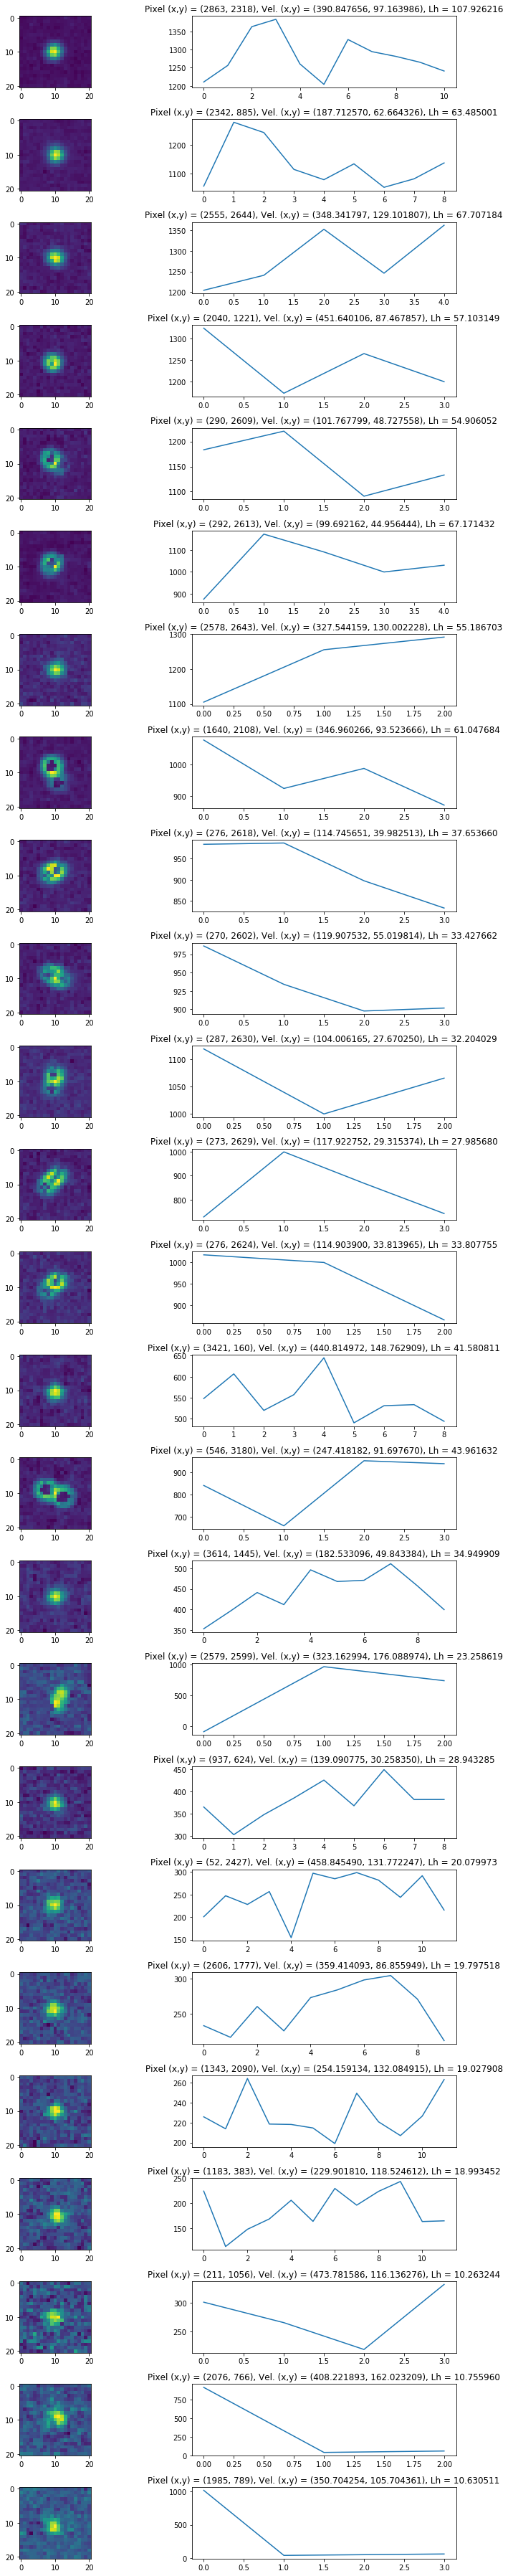

In [13]:
stamps_fig = stamper.plot_stamps(results, lc_list, stamps, 0.03)

### Sort the simulated objects

1) Run the `sort_fakes.py` code with the same options as the first python script.

```
python sort_fakes.py --image_dir image_dir --results_dir results_dir --results_suffix results_suffix --time_file time_file
```

2) This will create three separate files.

* `keep_fake.csv`
    * This file contains all of the simulated objects that were eligible to be found in the search parameters and in the given image files. It takes out objects that did not reach the required threshold on the number of unmasked observations. It will also remove those that left the image plane before the required number of observations.
    
* `found_fake.csv`
    * This file contains all of the fake objects that correspond to a result in the search results file.
    
* `found_res.csv`
    * This file contains the results file information for the corresponding objects in `found_fake.csv`
    
3) Then you can load in the files and use the following code to measure how well kbmod did recovering the simulated objects.

In [22]:
keep_fake = pd.read_csv(os.path.join(results_dir, 'keep_fake.csv'))
found_fake = pd.read_csv(os.path.join(results_dir, 'found_fake.csv'))
found_res = pd.read_csv(os.path.join(results_dir, 'found_res.csv'))

No handles with labels found to put in legend.


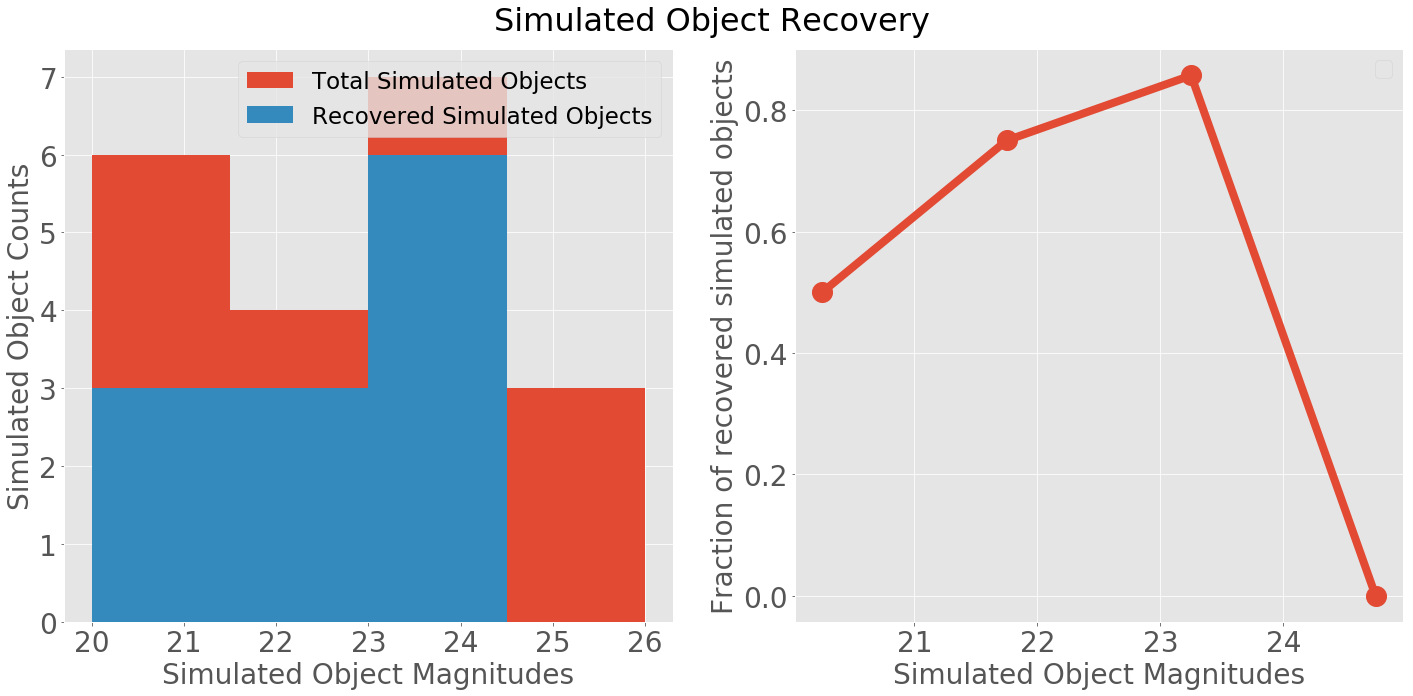

In [30]:
fig = plt.figure(figsize=(24, 10))

fig.add_subplot(1,2,1)
n, bins, _ = plt.hist(keep_fake['mag'], bins=4, range=(20, 26), label='Total Simulated Objects')
n2, bins2, _ = plt.hist(found_fake['mag'], bins=bins, range=(20, 26), 
                        histtype='stepfilled', lw=6, label='Recovered Simulated Objects')
plt.xlabel('Simulated Object Magnitudes', size=28)
plt.ylabel('Simulated Object Counts', size=28)
plt.legend(fontsize=23)
plt.xticks(size=28)
plt.yticks(size=28)

fig.add_subplot(1,2,2)
plt.plot(bins[:-1]+0.25, n2/n, '-o', markersize=20, lw=8)
plt.xlabel('Simulated Object Magnitudes', size=28)
plt.ylabel('Fraction of recovered simulated objects', size=28)
plt.legend(fontsize=22)
plt.xticks(size=28)
plt.yticks(size=28)

plt.suptitle('Simulated Object Recovery', size=32)
plt.subplots_adjust(top=0.92)

No handles with labels found to put in legend.


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 7 Text yticklabel objects>)

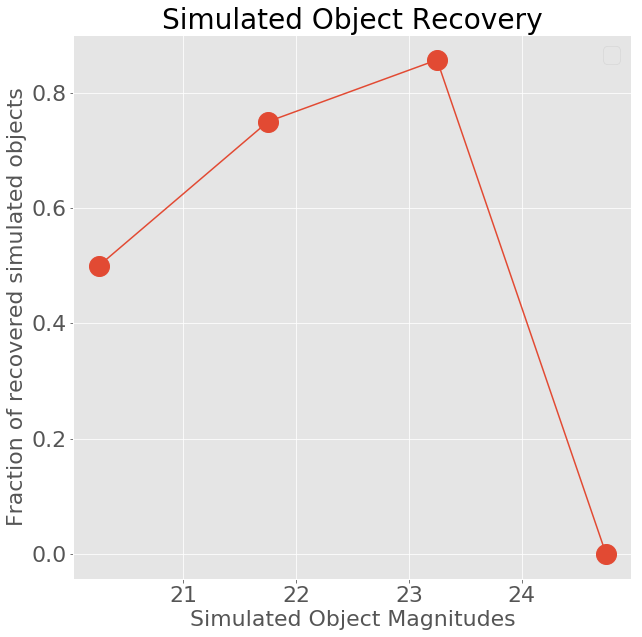

In [31]:
plt.figure(figsize=(10, 10))
plt.plot(bins[:-1]+0.25, n2/n, '-o', markersize=20)
plt.xlabel('Simulated Object Magnitudes', size=22)
plt.ylabel('Fraction of recovered simulated objects', size=22)
plt.legend(fontsize=22)
plt.title('Simulated Object Recovery', size=28)
plt.xticks(size=22)
plt.yticks(size=22)